In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import numpy as np
import math

In [2]:
df = pd.read_csv('Data2.csv', on_bad_lines='skip', encoding='cp1252', delimiter=';')
df.columns = ['country_name', 'region', 'gdp_per_capita', 'population', 'co2_emission', 'area']
df.set_index('country_name', inplace=True)
df.gdp_per_capita = df.gdp_per_capita.astype(str).str.replace(',', '.').astype(float)
df.co2_emission = df.co2_emission.astype(str).str.replace(',', '.').astype(float)
df.area = df.area.astype(str).str.replace(',', '.').astype(float)
df.gdp_per_capita = df.gdp_per_capita.abs()
df.area = df.area.abs()
df.gdp_per_capita.fillna(df.gdp_per_capita.mean(), inplace=True)
df.population.fillna(df.population.mean(), inplace=True)
df.co2_emission.fillna(df.co2_emission.mean(), inplace=True)
df.population = df.population.astype(int)
df['density'] = df.population / df.area
df

,region,gdp_per_capita,population,co2_emission,area,density
country_name,,,,,,
Afghanistan,South Asia,561.778746,34656032,9809.225000,652860.0,53.083405
Albania,Europe & Central Asia,4124.982390,2876101,5716.853000,28750.0,100.038296
Algeria,Middle East & North Africa,3916.881571,40606052,145400.217000,2381740.0,17.048902
American Samoa,East Asia & Pacific,11834.745230,55599,165114.116337,200.0,277.995000
Andorra,Europe & Central Asia,36988.622030,77281,462.042000,470.0,164.427660
...,...,...,...,...,...,...
Virgin Islands (U.S.),Latin America & Caribbean,13445.593416,102951,165114.116337,350.0,294.145714
West Bank and Gaza,Middle East & North Africa,2943.404534,4551566,165114.116337,6020.0,756.074086
"Yemen, Rep.",Middle East & North Africa,990.334774,27584213,22698.730000,527970.0,52.245796


In [3]:
gdp_features = df['gdp_per_capita'].to_numpy().reshape(-1, 1)
gdp_features

array([[   561.7787463 ],
       [  4124.98239   ],
       [  3916.881571  ],
       [ 11834.74523   ],
       [ 36988.62203   ],
       [  3308.700233  ],
       [ 14462.17628   ],
       [ 12440.32098   ],
       [  3614.688357  ],
       [ 13445.59341606],
       [ 49755.31548   ],
       [ 44757.6349    ],
       [  3878.709257  ],
       [ 28785.47767   ],
       [ 22579.09342   ],
       [  1358.779029  ],
       [ 15891.62655   ],
       [  4989.427763  ],
       [ 41271.48215   ],
       [  4744.736397  ],
       [   789.4404107 ],
       [ 13445.59341606],
       [  2773.547135  ],
       [  3104.956089  ],
       [  4808.405425  ],
       [  6924.149775  ],
       [  8649.948492  ],
       [ 13445.59341606],
       [ 26939.41751   ],
       [  7469.025247  ],
       [   627.1030788 ],
       [   285.7274421 ],
       [  2997.75268   ],
       [  1269.907238  ],
       [  1374.514172  ],
       [ 42183.2951    ],
       [ 13445.59341606],
       [   382.2131743 ],
       [   6

In [4]:
max_clusters = 13
n_clusters_list = list(range(1, max_clusters + 1))
sse = []

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(gdp_features)
    sse.append(kmeans.inertia_)

gdp_kmeans_results = pd.DataFrame.from_dict({
    'n_clusters': n_clusters_list,
    'sse': sse
}).reset_index(drop=True).set_index('n_clusters')
gdp_kmeans_results

,sse
n_clusters,
1,6.150152e+10
2,1.580377e+10
3,9.052527e+09
4,4.492411e+09
5,2.984519e+09
6,1.933117e+09
7,1.430037e+09
8,9.406344e+08
9,7.658671e+08


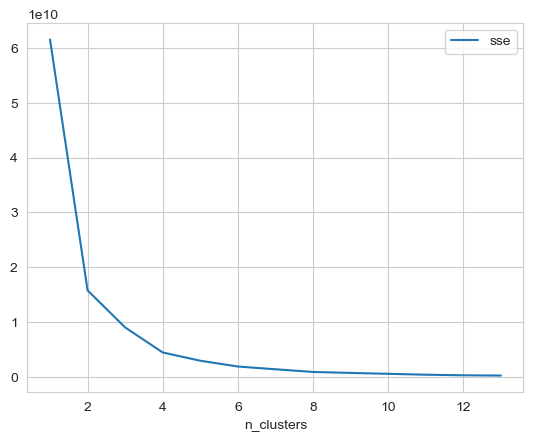

In [5]:
gdp_kmeans_results.plot();

In [6]:
gdp_kl = KneeLocator(n_clusters_list, sse, curve='convex', direction='decreasing')
gdp_kl.elbow

3

In [7]:
gdp_kmeans = KMeans(n_clusters=gdp_kl.elbow, n_init=10)
gdp_kmeans.fit(gdp_features)

KMeans(n_clusters=3, n_init=10)

In [8]:
gdp_kmeans.labels_

array([2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1,
       2, 2, 2, 2, 1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2])

In [9]:
_, gdp_countries_count = np.unique(gdp_kmeans.labels_, return_counts=True)
gdp_countries_count

array([ 66,  28, 123], dtype=int64)

In [10]:
first_gdp_cluster = df[gdp_kmeans.labels_ == 0]
first_gdp_cluster

,region,gdp_per_capita,population,co2_emission,area,density
country_name,,,,,,
American Samoa,East Asia & Pacific,11834.745230,55599,165114.116337,200.0,277.995000
Antigua and Barbuda,Latin America & Caribbean,14462.176280,100963,531.715000,440.0,229.461364
Argentina,Latin America & Caribbean,12440.320980,43847430,204024.546000,2780400.0,15.770188
Aruba,Latin America & Caribbean,13445.593416,104822,872.746000,180.0,582.344444
"Bahamas, The",Latin America & Caribbean,28785.477670,391232,2416.553000,13880.0,28.186744
...,...,...,...,...,...,...
Turkey,Europe & Central Asia,10862.600400,79512426,345981.450000,785350.0,101.244574
Turks and Caicos Islands,Latin America & Caribbean,13445.593416,34900,205.352000,950.0,36.736842
Uruguay,Latin America & Caribbean,15220.566030,3444006,6747.280000,176220.0,19.543786


In [11]:
second_gdp_cluster = df[gdp_kmeans.labels_ == 1]
second_gdp_cluster

,region,gdp_per_capita,population,co2_emission,area,density
country_name,,,,,,
Andorra,Europe & Central Asia,36988.62203,77281,4.620420e+02,470.0,164.427660
Australia,East Asia & Pacific,49755.31548,24127159,3.612618e+05,7741220.0,3.116713
Austria,Europe & Central Asia,44757.63490,8747358,5.871234e+04,83879.0,104.285435
Belgium,Europe & Central Asia,41271.48215,11348159,9.335082e+04,30530.0,371.705175
Canada,North America,42183.29510,36286425,5.371935e+05,9984670.0,3.634214
Denmark,Europe & Central Asia,53578.75657,5731118,3.349804e+04,42922.0,133.524020
Finland,Europe & Central Asia,43401.22834,5495096,4.730063e+04,338420.0,16.237504
France,Europe & Central Asia,36857.11923,66896109,3.032756e+05,549087.0,121.831529
Germany,Europe & Central Asia,42161.31966,82667685,7.198834e+05,357380.0,231.315924


In [12]:
third_gdp_cluster = df[gdp_kmeans.labels_ == 2]
third_gdp_cluster

,region,gdp_per_capita,population,co2_emission,area,density
country_name,,,,,,
Afghanistan,South Asia,561.778746,34656032,9809.225000,652860.0,53.083405
Albania,Europe & Central Asia,4124.982390,2876101,5716.853000,28750.0,100.038296
Algeria,Middle East & North Africa,3916.881571,40606052,145400.217000,2381740.0,17.048902
Angola,Sub-Saharan Africa,3308.700233,28813463,34763.160000,1246700.0,23.111786
Armenia,Europe & Central Asia,3614.688357,2924816,5529.836000,29740.0,98.346200
...,...,...,...,...,...,...
Vietnam,East Asia & Pacific,2170.648054,92701100,166910.839000,330967.0,280.091671
West Bank and Gaza,Middle East & North Africa,2943.404534,4551566,165114.116337,6020.0,756.074086
"Yemen, Rep.",Middle East & North Africa,990.334774,27584213,22698.730000,527970.0,52.245796


In [13]:
first_gdp_cluster.groupby('region').gdp_per_capita.max().sort_values(ascending=False)

region
Latin America & Caribbean     30790.104790
Europe & Central Asia         30661.221810
East Asia & Pacific           27538.806130
Middle East & North Africa    27359.230330
Sub-Saharan Africa            15075.719440
North America                 13445.593416
South Asia                     9875.278428
Name: gdp_per_capita, dtype: float64

In [14]:
second_gdp_cluster.groupby('region').gdp_per_capita.max().sort_values(ascending=False)

region
Europe & Central Asia         100738.68420
East Asia & Pacific            74017.18471
Middle East & North Africa     59324.33877
North America                  57638.15909
Name: gdp_per_capita, dtype: float64

In [15]:
third_gdp_cluster.groupby('region').gdp_per_capita.max().sort_values(ascending=False)

region
Sub-Saharan Africa            9630.944028
Europe & Central Asia         9522.771041
East Asia & Pacific           9508.237750
Latin America & Caribbean     9364.821525
Middle East & North Africa    8257.294391
South Asia                    3909.989066
Name: gdp_per_capita, dtype: float64

In [16]:
density_features = df['density'].to_numpy().reshape(-1, 1)
density_features

array([[5.30834053e+01],
       [1.00038296e+02],
       [1.70489021e+01],
       [2.77995000e+02],
       [1.64427660e+02],
       [2.31117855e+01],
       [2.29461364e+02],
       [1.57701877e+01],
       [9.83462004e+01],
       [5.82344444e+02],
       [3.11671274e+00],
       [1.04285435e+02],
       [1.12728337e+02],
       [2.81867435e+01],
       [1.84847082e+03],
       [1.10378351e+03],
       [6.62781395e+02],
       [4.57953757e+01],
       [3.71705175e+02],
       [1.59753592e+01],
       [9.47394388e+01],
       [1.30662000e+03],
       [2.07783768e+01],
       [9.91086858e+00],
       [6.86743995e+01],
       [3.86822065e+00],
       [2.43845084e+01],
       [2.04406667e+02],
       [7.33441941e+01],
       [6.42146126e+01],
       [6.79980782e+01],
       [3.78157276e+02],
       [1.33885856e+02],
       [8.70656761e+01],
       [4.92999937e+01],
       [3.63421375e+00],
       [2.30170455e+02],
       [7.37523034e+00],
       [1.12558746e+01],
       [8.66005263e+02],


In [17]:
max_clusters = 13
n_clusters_list = list(range(1, max_clusters + 1))
sse = []

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(density_features)
    sse.append(kmeans.inertia_)

density_kmeans_results = pd.DataFrame.from_dict({
    'n_clusters': n_clusters_list,
    'sse': sse
}).reset_index(drop=True).set_index('n_clusters')
density_kmeans_results

,sse
n_clusters,
1,8.750913e+08
2,1.238429e+08
3,2.474531e+07
4,1.014364e+07
5,5.840313e+06
6,2.994677e+06
7,2.103726e+06
8,1.442330e+06
9,9.872417e+05


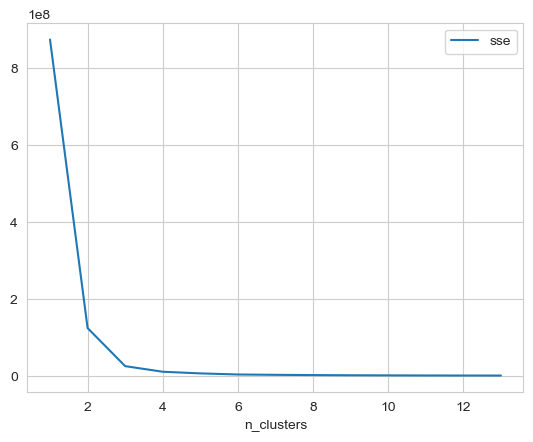

In [18]:
density_kmeans_results.plot();

In [19]:
density_kl = KneeLocator(n_clusters_list, sse, curve='convex', direction='decreasing')
density_kl.elbow

3

In [20]:
density_kmeans = KMeans(n_clusters=density_kl.elbow, n_init=10)
density_kmeans.fit(density_features)

KMeans(n_clusters=3, n_init=10)

In [21]:
density_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
_, density_countries_count = np.unique(density_kmeans.labels_, return_counts=True)
density_countries_count

array([212,   2,   3], dtype=int64)

In [23]:
first_density_cluster = df[density_kmeans.labels_ == 0]
first_density_cluster

,region,gdp_per_capita,population,co2_emission,area,density
country_name,,,,,,
Afghanistan,South Asia,561.778746,34656032,9809.225000,652860.0,53.083405
Albania,Europe & Central Asia,4124.982390,2876101,5716.853000,28750.0,100.038296
Algeria,Middle East & North Africa,3916.881571,40606052,145400.217000,2381740.0,17.048902
American Samoa,East Asia & Pacific,11834.745230,55599,165114.116337,200.0,277.995000
Andorra,Europe & Central Asia,36988.622030,77281,462.042000,470.0,164.427660
...,...,...,...,...,...,...
Virgin Islands (U.S.),Latin America & Caribbean,13445.593416,102951,165114.116337,350.0,294.145714
West Bank and Gaza,Middle East & North Africa,2943.404534,4551566,165114.116337,6020.0,756.074086
"Yemen, Rep.",Middle East & North Africa,990.334774,27584213,22698.730000,527970.0,52.245796


In [24]:
second_density_cluster = df[density_kmeans.labels_ == 1]
second_density_cluster

,region,gdp_per_capita,population,co2_emission,area,density
country_name,,,,,,
"Macao SAR, China",East Asia & Pacific,74017.184710,612167,1283.450000,30.3,20203.531353
Monaco,Europe & Central Asia,13445.593416,38499,165114.116337,2.0,19249.500000


In [25]:
third_density_cluster = df[density_kmeans.labels_ == 2]
third_density_cluster

,region,gdp_per_capita,population,co2_emission,area,density
country_name,,,,,,
Gibraltar,Europe & Central Asia,13445.593416,34408,528.048,10.0,3440.800000
"Hong Kong SAR, China",East Asia & Pacific,43740.992880,7346700,46222.535,1105.0,6648.597285
Singapore,East Asia & Pacific,52962.491570,5607283,56372.791,719.0,7798.724618


In [26]:
first_density_cluster.groupby('region').density.max().sort_values(ascending=False)

region
Middle East & North Africa    1848.470817
South Asia                    1391.640000
North America                 1306.620000
Latin America & Caribbean     1176.617647
Europe & Central Asia          866.005263
East Asia & Pacific            652.450000
Sub-Saharan Africa             619.349510
Name: density, dtype: float64

In [27]:
second_density_cluster.groupby('region').density.max().sort_values(ascending=False)

region
East Asia & Pacific      20203.531353
Europe & Central Asia    19249.500000
Name: density, dtype: float64

In [28]:
third_density_cluster.groupby('region').density.max().sort_values(ascending=False)

region
East Asia & Pacific      7798.724618
Europe & Central Asia    3440.800000
Name: density, dtype: float64

In [29]:
silhouette_score(gdp_features, gdp_kmeans.labels_)

0.6694916845572668

In [30]:
silhouette_score(density_features, density_kmeans.labels_)

0.9532906385438781

In [31]:
numeric = df.select_dtypes(exclude=[object])
numeric

,gdp_per_capita,population,co2_emission,area,density
country_name,,,,,
Afghanistan,561.778746,34656032,9809.225000,652860.0,53.083405
Albania,4124.982390,2876101,5716.853000,28750.0,100.038296
Algeria,3916.881571,40606052,145400.217000,2381740.0,17.048902
American Samoa,11834.745230,55599,165114.116337,200.0,277.995000
Andorra,36988.622030,77281,462.042000,470.0,164.427660
...,...,...,...,...,...
Virgin Islands (U.S.),13445.593416,102951,165114.116337,350.0,294.145714
West Bank and Gaza,2943.404534,4551566,165114.116337,6020.0,756.074086
"Yemen, Rep.",990.334774,27584213,22698.730000,527970.0,52.245796


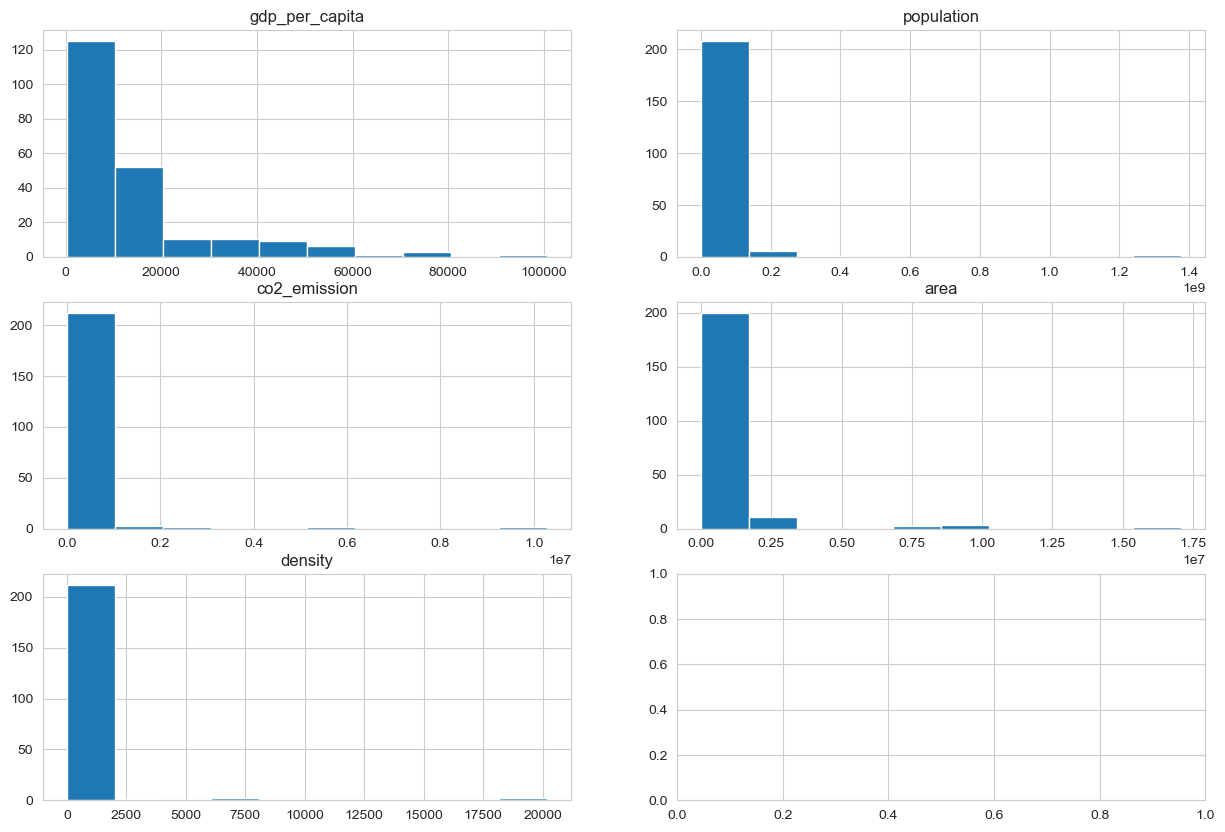

In [32]:
fig, axes = plt.subplots(math.ceil(numeric.shape[1] / 2), numeric.shape[1] // 2, figsize=(15, 10))

for ax, column in zip(axes.ravel(), numeric.columns):
    ax.set_title(column)
    numeric[column].hist(ax=ax)

In [33]:
def has_linear_dependence(first_df: pd.DataFrame, second_df: pd.DataFrame) -> bool:
    corr = first_df.corrwith(second_df).abs()
    return (0.8 <= corr).any()

In [34]:
df1 = pd.DataFrame.from_dict({
    'a': [1, 2, 3],
    'b': [4, 8, 12]
})
df2 = pd.DataFrame.from_dict({
    'a': [2, 3, 5],
    'b': [0, -10, 3]
})

In [35]:
has_linear_dependence(df1, df2)

True